# Data Manipulation using Pandas

Author: Andreas Chandra \
[Email](mailto:andreas@jakartaresearch.com) [Github](https://github.com/andreaschandra) [Blog](https://datafolksid.xyz/andreas) \
If you want to talk with me, proposed schedule [here](https://calendly.com/andreaschandra/)

## Contents

- A Brief Overview of Pandas
- Read/Write Pandas
- Creating DataFrame from Dict/List
- Basic Functionalities and Attributes (Head, Tail, Dtype, Shape, Describe, Missing Values)
- Type Casting
- Renaming Column
- Slicing and Dicing DataFrame (Filtering)
- Reindexing
- Dropping and Poping
- Duplicate data
- Numeric Calculation
- String Operation
- Datetime
- Sorting
- Grouping
- Pandas Apply and Map Function
- Appending, Joining, Merging, Concatenating 2 or more DataFrame
- Pivot and Stack
- Brief of Timeseries
- Window Function
- Basic Plotting

## Day 1

### Overview of Pandas

pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language.

Installation \
`pip install pandas`

Repo: https://github.com/pandas-dev/pandas

In [1]:
# Import the library
import pandas as pd

In [2]:
pd.options.display.max_columns = 50

### Read/Write Functions

https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html

Common read functions \
`read_csv()` `read_excel()` `read_table()` `read_json()`

In [3]:
d_data = pd.read_csv("telcom_user_extended.csv")

Common write functions \
`to_csv` `to_json` `to_excel`

In [4]:
d_data.to_csv("telecom_users_2.csv", index=False)

### Creating DataFrame from List/Dictionary

From list

In [5]:
user_profile = [
    {"id": 101, "gender": "L", "age": 20, "last education": "high school", "is_married": True},
    {"id": 102, "gender": "P", "age": 18, "last education": "middle school", "is_married": False},
    {"id": 103, "gender": "L", "age": 19, "last education": "high school", "is_married": True},
    {"id": 104, "gender": "P", "age": 28, "last education": "master's degree", "is_married": False},
    {"id": 105, "gender": None, "age": 21, "last education": "bachelor's degree", "is_married": True}
]

In [6]:
pd.DataFrame(user_profile)

,id,gender,age,last education,is_married
0,101,L,20,high school,True
1,102,P,18,middle school,False
2,103,L,19,high school,True
3,104,P,28,master's degree,False
4,105,None,21,bachelor's degree,True


Only list

In [7]:
number_list_only = [
    [101,"L",20,'high school', True], 
    [102,'P',18,'middle school', False],
    [103,'L',19,'high school', True],
    [104,'P',28,"master's degree", False],
    [105,None,21,"bachelor's degree", True],
]

In [8]:
pd.DataFrame(data=number_list_only, columns=["id", "gender", "age", "last education", 'is_married'])

,id,gender,age,last education,is_married
0,101,L,20,high school,True
1,102,P,18,middle school,False
2,103,L,19,high school,True
3,104,P,28,master's degree,False
4,105,None,21,bachelor's degree,True


From dictionary

In [9]:
user_profile_dict = {
    'id': [101,102,103,104,105],
    'gender': ["L", "P", "L", "P", None],
    'last education': ["high school", "middle school", "high school", "master's degree", "bachelor's degree"],
    'is_married': [True, False, True, False, True]
}

In [10]:
pd.DataFrame(user_profile_dict)

,id,gender,last education,is_married
0,101,L,high school,True
1,102,P,middle school,False
2,103,L,high school,True
3,104,P,master's degree,False
4,105,None,bachelor's degree,True


### Basic Functionalities

Head & Tail

In [11]:
d_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InstallApp,email,kodepos,RecordedDate,age,number_of_send_message,number_of_received_message,minutes_of_call,num_of_call,internet_usage_megabytes,netflix_usage_megabytes,youtube_usage_megabytes,game_usage_megabytes,average_internet_ping,average_internet_speed_in_megabytes
0,9381-NDKME,Female,1,Yes,No,24,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Credit card (automatic),40.65,933.3,Yes,NaN,CjnfS@rocketmail.com,51365,30/01/2021,67.0,10.0,34.0,126.0,14.0,2629.0,976.0,599.0,8.0,15.0,20.425580
1,3831-YCPUO,Female,No,Yes,Yes,72,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),109.50,7854.9,No,NaN,zzKVD@fall.com.sg,41104,03/01/2021,24.0,135.0,95.0,70.0,42.0,37258.0,7090.0,5330.0,6664.0,15.0,21.759168
2,1506-YJTYT,Male,No,Yes,Yes,45,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,Two year,No,Credit card (automatic),73.85,3371,No,NaN,KLfPl@apple.com,59928,01/01/2021,37.0,78.0,79.0,168.0,22.0,19331.0,7069.0,6596.0,761.0,15.0,22.123215
3,2272-UOINI,Female,No,No,No,7,Yes,No,DSL,Yes,Yes,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,78.50,571.05,No,NaN,RmCEn@fall.com.sg,55765,07/01/2021,39.0,66.0,89.0,166.0,28.0,16221.0,8202.0,6167.0,608.0,15.0,22.169331
4,1641-BYBTK,Male,No,No,Yes,6,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.20,98.35,No,NaN,dLZoI@apple.com,35433,26/01/2021,37.0,66.0,70.0,132.0,22.0,17526.0,9309.0,8484.0,613.0,15.0,22.263776


In [12]:
d_data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InstallApp,email,kodepos,RecordedDate,age,number_of_send_message,number_of_received_message,minutes_of_call,num_of_call,internet_usage_megabytes,netflix_usage_megabytes,youtube_usage_megabytes,game_usage_megabytes,average_internet_ping,average_internet_speed_in_megabytes
7709,6332-FBZRI,Male,No,Yes,Yes,67,Yes,Yes,DSL,Yes,Yes,Yes,Yes,No,No,One year,Yes,Credit card (automatic),69.35,4653.25,No,NaN,dxJJX@amail.comz,90058,17/01/2021,40.0,88.0,84.0,107.0,23.0,26881.0,10126.0,5983.0,587.0,224.0,10.154946
7710,7351-KYHQH,Female,1,No,No,7,Yes,No,DSL,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,64.95,493.65,No,NaN,VPdKY@gmail.com,87598,10/01/2021,61.0,12.0,33.0,133.0,10.0,2188.0,777.0,556.0,4.0,224.0,10.155405
7711,6261-LHRTG,Female,No,No,No,26,Yes,No,DSL,No,Yes,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),54.75,1406.9,No,NaN,kWWJs@apple.com,95724,30/01/2021,40.0,73.0,43.0,165.0,24.0,10327.0,5479.0,9307.0,685.0,225.0,10.065166
7712,1728-BQDMA,Female,No,No,No,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,44.45,82.7,No,NaN,hvWGv@rocketmail.com,81300,17/01/2021,39.0,89.0,58.0,93.0,24.0,19240.0,5877.0,5635.0,881.0,225.0,10.065489
7713,0134-XWXCE,Female,1,No,No,44,Yes,No,DSL,No,No,Yes,Yes,Yes,Yes,One year,No,Bank transfer (automatic),74.85,3268.05,No,NaN,IRuXb@yahoo.com,87597,25/01/2021,50.0,20.0,25.0,141.0,16.0,19613.0,581.0,725.0,4.0,225.0,10.066998


Shape of Dataset

In [13]:
d_data.shape

(7714, 36)

Data Types

In [14]:
d_data.dtypes

customerID                              object
gender                                  object
SeniorCitizen                           object
Partner                                 object
Dependents                              object
tenure                                   int64
PhoneService                            object
MultipleLines                           object
InternetService                         object
OnlineSecurity                          object
OnlineBackup                            object
DeviceProtection                        object
TechSupport                             object
StreamingTV                             object
StreamingMovies                         object
Contract                                object
PaperlessBilling                        object
PaymentMethod                           object
MonthlyCharges                         float64
TotalCharges                            object
Churn                                   object
InstallApp   

Statistical descriptive numeric columns

In [15]:
d_data.describe()

,tenure,MonthlyCharges,kodepos,age,number_of_send_message,number_of_received_message,minutes_of_call,num_of_call,internet_usage_megabytes,netflix_usage_megabytes,youtube_usage_megabytes,game_usage_megabytes,average_internet_ping,average_internet_speed_in_megabytes
count,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000
mean,32.325771,64.650745,60350.855328,36.130801,71.699507,72.963573,114.844957,26.724138,16232.904071,5734.112523,5728.490796,1878.779881,113.831216,18.939252
std,24.448769,30.211436,25567.055467,15.339467,45.090918,43.368072,52.609379,12.695575,11877.008036,3347.839763,3341.541199,2705.862163,67.431557,5.002963
min,0.000000,18.250000,10010.000000,17.000000,10.000000,20.000000,30.000000,10.000000,1025.000000,512.000000,512.000000,1.000000,15.000000,5.247223
25%,9.000000,35.150000,39146.250000,25.000000,28.000000,37.000000,73.000000,16.000000,6094.000000,965.000000,962.000000,9.000000,58.000000,17.046077
50%,29.000000,70.300000,64432.000000,33.000000,64.000000,64.000000,119.000000,24.000000,14239.500000,6624.000000,6662.500000,761.000000,116.000000,19.072952
75%,55.000000,90.000000,81462.750000,41.000000,96.000000,96.000000,144.000000,31.000000,23504.250000,8478.000000,8425.750000,1759.000000,145.750000,23.305500
max,72.000000,118.750000,99980.000000,84.000000,179.000000,179.000000,299.000000,59.000000,51160.000000,10239.000000,10239.000000,10235.000000,299.000000,24.735832


Dataset information for missing values and data types

In [16]:
d_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7714 entries, 0 to 7713
Data columns (total 36 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customerID                           7714 non-null   object 
 1   gender                               7581 non-null   object 
 2   SeniorCitizen                        7714 non-null   object 
 3   Partner                              7693 non-null   object 
 4   Dependents                           7714 non-null   object 
 5   tenure                               7714 non-null   int64  
 6   PhoneService                         7714 non-null   object 
 7   MultipleLines                        7714 non-null   object 
 8   InternetService                      7714 non-null   object 
 9   OnlineSecurity                       7714 non-null   object 
 10  OnlineBackup                         7714 non-null   object 
 11  DeviceProtection              

Counting missing values

In [17]:
d_data.isna().sum()

customerID                                0
gender                                  133
SeniorCitizen                             0
Partner                                  21
Dependents                                0
tenure                                    0
PhoneService                              0
MultipleLines                             0
InternetService                           0
OnlineSecurity                            0
OnlineBackup                              0
DeviceProtection                          0
TechSupport                               0
StreamingTV                               0
StreamingMovies                           0
Contract                                  0
PaperlessBilling                          0
PaymentMethod                             0
MonthlyCharges                            0
TotalCharges                              0
Churn                                     0
InstallApp                             7676
email                           

### Fill Missing Values

by `Series.fillna(value)` \
by `DataFrame.fillna(value)`

In [18]:
d_data.Partner.fillna('No', inplace=True)

In [19]:
d_data.Partner.isna().sum()

0

### Type Casting

https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#basics-dtypes

using `DataFrame.astype({'col': int, 'col2': str})` \
using `Series.astype(int|str|float)`

In [20]:
d_data.TotalCharges = d_data.TotalCharges.replace(' ', None)

In [21]:
d_data.TotalCharges = d_data.TotalCharges.astype(float)

In [22]:
d_data.dtypes

customerID                              object
gender                                  object
SeniorCitizen                           object
Partner                                 object
Dependents                              object
tenure                                   int64
PhoneService                            object
MultipleLines                           object
InternetService                         object
OnlineSecurity                          object
OnlineBackup                            object
DeviceProtection                        object
TechSupport                             object
StreamingTV                             object
StreamingMovies                         object
Contract                                object
PaperlessBilling                        object
PaymentMethod                           object
MonthlyCharges                         float64
TotalCharges                           float64
Churn                                   object
InstallApp   

### Renaming Columns

In [23]:
d_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InstallApp,email,kodepos,RecordedDate,age,number_of_send_message,number_of_received_message,minutes_of_call,num_of_call,internet_usage_megabytes,netflix_usage_megabytes,youtube_usage_megabytes,game_usage_megabytes,average_internet_ping,average_internet_speed_in_megabytes
0,9381-NDKME,Female,1,Yes,No,24,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Credit card (automatic),40.65,933.30,Yes,NaN,CjnfS@rocketmail.com,51365,30/01/2021,67.0,10.0,34.0,126.0,14.0,2629.0,976.0,599.0,8.0,15.0,20.425580
1,3831-YCPUO,Female,No,Yes,Yes,72,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),109.50,7854.90,No,NaN,zzKVD@fall.com.sg,41104,03/01/2021,24.0,135.0,95.0,70.0,42.0,37258.0,7090.0,5330.0,6664.0,15.0,21.759168
2,1506-YJTYT,Male,No,Yes,Yes,45,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,Two year,No,Credit card (automatic),73.85,3371.00,No,NaN,KLfPl@apple.com,59928,01/01/2021,37.0,78.0,79.0,168.0,22.0,19331.0,7069.0,6596.0,761.0,15.0,22.123215
3,2272-UOINI,Female,No,No,No,7,Yes,No,DSL,Yes,Yes,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,78.50,571.05,No,NaN,RmCEn@fall.com.sg,55765,07/01/2021,39.0,66.0,89.0,166.0,28.0,16221.0,8202.0,6167.0,608.0,15.0,22.169331
4,1641-BYBTK,Male,No,No,Yes,6,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.20,98.35,No,NaN,dLZoI@apple.com,35433,26/01/2021,37.0,66.0,70.0,132.0,22.0,17526.0,9309.0,8484.0,613.0,15.0,22.263776


In [24]:
d_data.rename(columns={'customerID':'customer_id', 'gender': 'gender', 'tenure': 'tenure'}, inplace=True)

In [25]:
d_data.head()

,customer_id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InstallApp,email,kodepos,RecordedDate,age,number_of_send_message,number_of_received_message,minutes_of_call,num_of_call,internet_usage_megabytes,netflix_usage_megabytes,youtube_usage_megabytes,game_usage_megabytes,average_internet_ping,average_internet_speed_in_megabytes
0,9381-NDKME,Female,1,Yes,No,24,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Credit card (automatic),40.65,933.30,Yes,NaN,CjnfS@rocketmail.com,51365,30/01/2021,67.0,10.0,34.0,126.0,14.0,2629.0,976.0,599.0,8.0,15.0,20.425580
1,3831-YCPUO,Female,No,Yes,Yes,72,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),109.50,7854.90,No,NaN,zzKVD@fall.com.sg,41104,03/01/2021,24.0,135.0,95.0,70.0,42.0,37258.0,7090.0,5330.0,6664.0,15.0,21.759168
2,1506-YJTYT,Male,No,Yes,Yes,45,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,Two year,No,Credit card (automatic),73.85,3371.00,No,NaN,KLfPl@apple.com,59928,01/01/2021,37.0,78.0,79.0,168.0,22.0,19331.0,7069.0,6596.0,761.0,15.0,22.123215
3,2272-UOINI,Female,No,No,No,7,Yes,No,DSL,Yes,Yes,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,78.50,571.05,No,NaN,RmCEn@fall.com.sg,55765,07/01/2021,39.0,66.0,89.0,166.0,28.0,16221.0,8202.0,6167.0,608.0,15.0,22.169331
4,1641-BYBTK,Male,No,No,Yes,6,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.20,98.35,No,NaN,dLZoI@apple.com,35433,26/01/2021,37.0,66.0,70.0,132.0,22.0,17526.0,9309.0,8484.0,613.0,15.0,22.263776


### Duplicate Data

find duplicate entries using `DataFrame.duplicated()`

In [26]:
d_data[d_data.duplicated(subset='customer_id')]

,customer_id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InstallApp,email,kodepos,RecordedDate,age,number_of_send_message,number_of_received_message,minutes_of_call,num_of_call,internet_usage_megabytes,netflix_usage_megabytes,youtube_usage_megabytes,game_usage_megabytes,average_internet_ping,average_internet_speed_in_megabytes
5986,6223-DHJGV,Female,No,No,No,42,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,20.65,958.10,No,NaN,RXWMk@fall.com.sg,72470,03/01/2021,32.0,45.0,85.0,113.0,27.0,4421.0,7126.0,10071.0,797.0,112.0,19.379743
5987,1732-FEKLD,Female,No,No,No,54,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,No,One year,Yes,Bank transfer (automatic),94.75,5121.75,No,NaN,NcPCI@rocketmail.com,65970,30/01/2021,28.0,80.0,84.0,179.0,27.0,16090.0,9676.0,8584.0,999.0,112.0,19.379970
5988,7554-NEWDD,Male,No,No,No,10,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),25.70,251.60,No,NaN,VyGMi@gmail.c,61890,03/01/2021,22.0,98.0,179.0,65.0,32.0,28264.0,5140.0,9199.0,2164.0,112.0,19.381090
5989,7572-KPVKK,Male,No,No,Yes,62,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,104.05,6590.50,No,NaN,xVbYS@fall.com.sg,74663,26/01/2021,26.0,61.0,77.0,60.0,21.0,19807.0,7709.0,9849.0,728.0,112.0,19.381623
5990,6946-LMSQS,Male,1,Yes,No,25,Yes,Yes,Fiber optic,Yes,No,No,No,No,Yes,One year,Yes,Electronic check,89.05,2177.45,Yes,NaN,YRoaR@salesforce.com,69035,08/01/2021,79.0,23.0,36.0,279.0,10.0,3031.0,967.0,1004.0,4.0,112.0,19.381734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7709,6332-FBZRI,Male,No,Yes,Yes,67,Yes,Yes,DSL,Yes,Yes,Yes,Yes,No,No,One year,Yes,Credit card (automatic),69.35,4653.25,No,NaN,dxJJX@amail.comz,90058,17/01/2021,40.0,88.0,84.0,107.0,23.0,26881.0,10126.0,5983.0,587.0,224.0,10.154946
7710,7351-KYHQH,Female,1,No,No,7,Yes,No,DSL,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,64.95,493.65,No,NaN,VPdKY@gmail.com,87598,10/01/2021,61.0,12.0,33.0,133.0,10.0,2188.0,777.0,556.0,4.0,224.0,10.155405
7711,6261-LHRTG,Female,No,No,No,26,Yes,No,DSL,No,Yes,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),54.75,1406.90,No,NaN,kWWJs@apple.com,95724,30/01/2021,40.0,73.0,43.0,165.0,24.0,10327.0,5479.0,9307.0,685.0,225.0,10.065166
7712,1728-BQDMA,Female,No,No,No,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,44.45,82.70,No,NaN,hvWGv@rocketmail.com,81300,17/01/2021,39.0,89.0,58.0,93.0,24.0,19240.0,5877.0,5635.0,881.0,225.0,10.065489


In [60]:
d_data.drop_duplicates(subset='customer_id', inplace=True)

In [61]:
d_data.shape

(5986, 38)

### Slicing

slicing and dicing in Pandas can be done using `.loc` `.iloc` `.at` `.iat` or just bracket

In [28]:
d_data.loc[:5, ['gender', 'SeniorCitizen', 'Partner']]

,gender,SeniorCitizen,Partner
0,Female,1,Yes
1,Female,No,Yes
2,Male,No,Yes
3,Female,No,No
4,Male,No,No
5,Male,No,No


In [29]:
d_data.gender.unique()

array(['Female', 'Male', nan], dtype=object)

In [30]:
d_data[d_data.gender == 'Female']

,customer_id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InstallApp,email,kodepos,RecordedDate,age,number_of_send_message,number_of_received_message,minutes_of_call,num_of_call,internet_usage_megabytes,netflix_usage_megabytes,youtube_usage_megabytes,game_usage_megabytes,average_internet_ping,average_internet_speed_in_megabytes
0,9381-NDKME,Female,1,Yes,No,24,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Credit card (automatic),40.65,933.30,Yes,NaN,CjnfS@rocketmail.com,51365,30/01/2021,67.0,10.0,34.0,126.0,14.0,2629.0,976.0,599.0,8.0,15.0,20.425580
1,3831-YCPUO,Female,No,Yes,Yes,72,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),109.50,7854.90,No,NaN,zzKVD@fall.com.sg,41104,03/01/2021,24.0,135.0,95.0,70.0,42.0,37258.0,7090.0,5330.0,6664.0,15.0,21.759168
3,2272-UOINI,Female,No,No,No,7,Yes,No,DSL,Yes,Yes,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,78.50,571.05,No,NaN,RmCEn@fall.com.sg,55765,07/01/2021,39.0,66.0,89.0,166.0,28.0,16221.0,8202.0,6167.0,608.0,15.0,22.169331
7,8654-DHAOW,Female,No,No,No,2,Yes,Yes,DSL,No,Yes,No,No,No,No,Month-to-month,No,Mailed check,54.15,101.65,No,NaN,xdQsX@salesforce.com,37348,03/01/2021,17.0,150.0,95.0,45.0,52.0,4801.0,7705.0,9359.0,7426.0,15.0,22.466924
8,7826-VVKWT,Female,1,Yes,Yes,24,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Two year,Yes,Electronic check,96.55,2263.45,No,NaN,ToQer@face_book.com,15694,19/01/2021,49.0,21.0,28.0,139.0,16.0,11755.0,888.0,909.0,6.0,15.0,22.605444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7706,5760-WRAHC,Female,1,No,No,22,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Month-to-month,Yes,Mailed check,69.75,1545.40,No,NaN,dWLPU@amail.comz,81440,13/01/2021,55.0,23.0,24.0,121.0,12.0,19941.0,838.0,710.0,1.0,224.0,10.148674
7710,7351-KYHQH,Female,1,No,No,7,Yes,No,DSL,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,64.95,493.65,No,NaN,VPdKY@gmail.com,87598,10/01/2021,61.0,12.0,33.0,133.0,10.0,2188.0,777.0,556.0,4.0,224.0,10.155405
7711,6261-LHRTG,Female,No,No,No,26,Yes,No,DSL,No,Yes,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),54.75,1406.90,No,NaN,kWWJs@apple.com,95724,30/01/2021,40.0,73.0,43.0,165.0,24.0,10327.0,5479.0,9307.0,685.0,225.0,10.065166
7712,1728-BQDMA,Female,No,No,No,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,44.45,82.70,No,NaN,hvWGv@rocketmail.com,81300,17/01/2021,39.0,89.0,58.0,93.0,24.0,19240.0,5877.0,5635.0,881.0,225.0,10.065489


### Assignin new columns and replace

In [31]:
d_data['IsMarried'] = 'No'

In [32]:
d_data.head()

,customer_id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InstallApp,email,kodepos,RecordedDate,age,number_of_send_message,number_of_received_message,minutes_of_call,num_of_call,internet_usage_megabytes,netflix_usage_megabytes,youtube_usage_megabytes,game_usage_megabytes,average_internet_ping,average_internet_speed_in_megabytes,IsMarried
0,9381-NDKME,Female,1,Yes,No,24,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Credit card (automatic),40.65,933.30,Yes,NaN,CjnfS@rocketmail.com,51365,30/01/2021,67.0,10.0,34.0,126.0,14.0,2629.0,976.0,599.0,8.0,15.0,20.425580,No
1,3831-YCPUO,Female,No,Yes,Yes,72,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),109.50,7854.90,No,NaN,zzKVD@fall.com.sg,41104,03/01/2021,24.0,135.0,95.0,70.0,42.0,37258.0,7090.0,5330.0,6664.0,15.0,21.759168,No
2,1506-YJTYT,Male,No,Yes,Yes,45,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,Two year,No,Credit card (automatic),73.85,3371.00,No,NaN,KLfPl@apple.com,59928,01/01/2021,37.0,78.0,79.0,168.0,22.0,19331.0,7069.0,6596.0,761.0,15.0,22.123215,No
3,2272-UOINI,Female,No,No,No,7,Yes,No,DSL,Yes,Yes,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,78.50,571.05,No,NaN,RmCEn@fall.com.sg,55765,07/01/2021,39.0,66.0,89.0,166.0,28.0,16221.0,8202.0,6167.0,608.0,15.0,22.169331,No
4,1641-BYBTK,Male,No,No,Yes,6,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.20,98.35,No,NaN,dLZoI@apple.com,35433,26/01/2021,37.0,66.0,70.0,132.0,22.0,17526.0,9309.0,8484.0,613.0,15.0,22.263776,No


Replace values
- Replace values `No` to `0` in SeniorCitizen

In [33]:
d_data.SeniorCitizen.unique()

array(['1', 'No'], dtype=object)

In [34]:
d_data.loc[d_data.SeniorCitizen=='No', 'SeniorCitizen'] = 0

- Replace Values Internet Connection `No` to `Wireless`

In [35]:
d_data.InternetService.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [36]:
d_data.loc[d_data.InternetService=='No', 'InternetService'] = 'Wireless'

In [37]:
d_data.head()

,customer_id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InstallApp,email,kodepos,RecordedDate,age,number_of_send_message,number_of_received_message,minutes_of_call,num_of_call,internet_usage_megabytes,netflix_usage_megabytes,youtube_usage_megabytes,game_usage_megabytes,average_internet_ping,average_internet_speed_in_megabytes,IsMarried
0,9381-NDKME,Female,1,Yes,No,24,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Credit card (automatic),40.65,933.30,Yes,NaN,CjnfS@rocketmail.com,51365,30/01/2021,67.0,10.0,34.0,126.0,14.0,2629.0,976.0,599.0,8.0,15.0,20.425580,No
1,3831-YCPUO,Female,0,Yes,Yes,72,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),109.50,7854.90,No,NaN,zzKVD@fall.com.sg,41104,03/01/2021,24.0,135.0,95.0,70.0,42.0,37258.0,7090.0,5330.0,6664.0,15.0,21.759168,No
2,1506-YJTYT,Male,0,Yes,Yes,45,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,Two year,No,Credit card (automatic),73.85,3371.00,No,NaN,KLfPl@apple.com,59928,01/01/2021,37.0,78.0,79.0,168.0,22.0,19331.0,7069.0,6596.0,761.0,15.0,22.123215,No
3,2272-UOINI,Female,0,No,No,7,Yes,No,DSL,Yes,Yes,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,78.50,571.05,No,NaN,RmCEn@fall.com.sg,55765,07/01/2021,39.0,66.0,89.0,166.0,28.0,16221.0,8202.0,6167.0,608.0,15.0,22.169331,No
4,1641-BYBTK,Male,0,No,Yes,6,Yes,No,Wireless,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.20,98.35,No,NaN,dLZoI@apple.com,35433,26/01/2021,37.0,66.0,70.0,132.0,22.0,17526.0,9309.0,8484.0,613.0,15.0,22.263776,No


### Exercise

1. Casting PostalCode integer to string
2. Fill missing values in `Gender` to `Not disclose`
3. Create new column based on `Tenure` if `Tenure > 50` then `Old` else `New` 
4. Filter DataFrame `Gender=Male` and `Partner=No` and `TotalCharges>=100`
5. Replace `Electronic check` in `PaymentMethod` to 'E-Wallet'

## Day 2

### Reindexing

In [38]:
d_partner = d_data[d_data["Partner"] == "Yes"].copy()

In [39]:
d_partner.loc[:5]

,customer_id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InstallApp,email,kodepos,RecordedDate,age,number_of_send_message,number_of_received_message,minutes_of_call,num_of_call,internet_usage_megabytes,netflix_usage_megabytes,youtube_usage_megabytes,game_usage_megabytes,average_internet_ping,average_internet_speed_in_megabytes,IsMarried
0,9381-NDKME,Female,1,Yes,No,24,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Credit card (automatic),40.65,933.3,Yes,NaN,CjnfS@rocketmail.com,51365,30/01/2021,67.0,10.0,34.0,126.0,14.0,2629.0,976.0,599.0,8.0,15.0,20.425580,No
1,3831-YCPUO,Female,0,Yes,Yes,72,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),109.50,7854.9,No,NaN,zzKVD@fall.com.sg,41104,03/01/2021,24.0,135.0,95.0,70.0,42.0,37258.0,7090.0,5330.0,6664.0,15.0,21.759168,No
2,1506-YJTYT,Male,0,Yes,Yes,45,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,Two year,No,Credit card (automatic),73.85,3371.0,No,NaN,KLfPl@apple.com,59928,01/01/2021,37.0,78.0,79.0,168.0,22.0,19331.0,7069.0,6596.0,761.0,15.0,22.123215,No


In [40]:
d_partner.iloc[:5]

,customer_id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InstallApp,email,kodepos,RecordedDate,age,number_of_send_message,number_of_received_message,minutes_of_call,num_of_call,internet_usage_megabytes,netflix_usage_megabytes,youtube_usage_megabytes,game_usage_megabytes,average_internet_ping,average_internet_speed_in_megabytes,IsMarried
0,9381-NDKME,Female,1,Yes,No,24,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Credit card (automatic),40.65,933.30,Yes,NaN,CjnfS@rocketmail.com,51365,30/01/2021,67.0,10.0,34.0,126.0,14.0,2629.0,976.0,599.0,8.0,15.0,20.425580,No
1,3831-YCPUO,Female,0,Yes,Yes,72,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),109.50,7854.90,No,NaN,zzKVD@fall.com.sg,41104,03/01/2021,24.0,135.0,95.0,70.0,42.0,37258.0,7090.0,5330.0,6664.0,15.0,21.759168,No
2,1506-YJTYT,Male,0,Yes,Yes,45,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,Two year,No,Credit card (automatic),73.85,3371.00,No,NaN,KLfPl@apple.com,59928,01/01/2021,37.0,78.0,79.0,168.0,22.0,19331.0,7069.0,6596.0,761.0,15.0,22.123215,No
6,3889-VWBID,Male,0,Yes,Yes,68,Yes,No,DSL,Yes,Yes,No,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),82.85,5776.45,No,NaN,XDJUd@yahoo.com,23102,16/01/2021,36.0,42.0,54.0,82.0,26.0,4852.0,9187.0,8473.0,701.0,15.0,22.434314,No
8,7826-VVKWT,Female,1,Yes,Yes,24,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Two year,Yes,Electronic check,96.55,2263.45,No,NaN,ToQer@face_book.com,15694,19/01/2021,49.0,21.0,28.0,139.0,16.0,11755.0,888.0,909.0,6.0,15.0,22.605444,No


In [41]:
d_partner.reset_index()

,index,customer_id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InstallApp,email,kodepos,RecordedDate,age,number_of_send_message,number_of_received_message,minutes_of_call,num_of_call,internet_usage_megabytes,netflix_usage_megabytes,youtube_usage_megabytes,game_usage_megabytes,average_internet_ping,average_internet_speed_in_megabytes,IsMarried
0,0,9381-NDKME,Female,1,Yes,No,24,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Credit card (automatic),40.65,933.30,Yes,NaN,CjnfS@rocketmail.com,51365,30/01/2021,67.0,10.0,34.0,126.0,14.0,2629.0,976.0,599.0,8.0,15.0,20.425580,No
1,1,3831-YCPUO,Female,0,Yes,Yes,72,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),109.50,7854.90,No,NaN,zzKVD@fall.com.sg,41104,03/01/2021,24.0,135.0,95.0,70.0,42.0,37258.0,7090.0,5330.0,6664.0,15.0,21.759168,No
2,2,1506-YJTYT,Male,0,Yes,Yes,45,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,Two year,No,Credit card (automatic),73.85,3371.00,No,NaN,KLfPl@apple.com,59928,01/01/2021,37.0,78.0,79.0,168.0,22.0,19331.0,7069.0,6596.0,761.0,15.0,22.123215,No
3,6,3889-VWBID,Male,0,Yes,Yes,68,Yes,No,DSL,Yes,Yes,No,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),82.85,5776.45,No,NaN,XDJUd@yahoo.com,23102,16/01/2021,36.0,42.0,54.0,82.0,26.0,4852.0,9187.0,8473.0,701.0,15.0,22.434314,No
4,8,7826-VVKWT,Female,1,Yes,Yes,24,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Two year,Yes,Electronic check,96.55,2263.45,No,NaN,ToQer@face_book.com,15694,19/01/2021,49.0,21.0,28.0,139.0,16.0,11755.0,888.0,909.0,6.0,15.0,22.605444,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3686,7697,3585-YNADK,Female,0,Yes,No,57,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,One year,No,Bank transfer (automatic),74.60,4368.95,No,NaN,tnTMY@rocketmail.com,89994,29/01/2021,17.0,152.0,163.0,77.0,58.0,13469.0,5572.0,6198.0,7125.0,222.0,10.333354,No
3687,7700,6198-PNNSZ,Female,0,Yes,No,56,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),109.80,6109.65,No,NaN,LXrXM@fall.com.sg,95799,14/01/2021,35.0,82.0,73.0,83.0,26.0,4059.0,7287.0,7637.0,914.0,223.0,10.239645,No
3688,7703,1301-LOPVR,Male,0,Yes,Yes,29,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,Yes,One year,Yes,Credit card (automatic),55.35,1636.95,No,NaN,aqPfM@salesforce.com,95312,22/01/2021,29.0,74.0,81.0,60.0,29.0,3604.0,8086.0,8199.0,562.0,223.0,10.242967,No
3689,7708,2533-QVMSK,Male,0,Yes,No,61,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,No,Two year,Yes,Electronic check,94.10,5638.30,Yes,NaN,SWFgH@gmail.c,99227,03/01/2021,35.0,44.0,80.0,113.0,28.0,14335.0,9488.0,6511.0,648.0,224.0,10.152071,No


In [42]:
d_partner.reset_index(drop=True)

,customer_id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InstallApp,email,kodepos,RecordedDate,age,number_of_send_message,number_of_received_message,minutes_of_call,num_of_call,internet_usage_megabytes,netflix_usage_megabytes,youtube_usage_megabytes,game_usage_megabytes,average_internet_ping,average_internet_speed_in_megabytes,IsMarried
0,9381-NDKME,Female,1,Yes,No,24,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Credit card (automatic),40.65,933.30,Yes,NaN,CjnfS@rocketmail.com,51365,30/01/2021,67.0,10.0,34.0,126.0,14.0,2629.0,976.0,599.0,8.0,15.0,20.425580,No
1,3831-YCPUO,Female,0,Yes,Yes,72,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),109.50,7854.90,No,NaN,zzKVD@fall.com.sg,41104,03/01/2021,24.0,135.0,95.0,70.0,42.0,37258.0,7090.0,5330.0,6664.0,15.0,21.759168,No
2,1506-YJTYT,Male,0,Yes,Yes,45,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,Two year,No,Credit card (automatic),73.85,3371.00,No,NaN,KLfPl@apple.com,59928,01/01/2021,37.0,78.0,79.0,168.0,22.0,19331.0,7069.0,6596.0,761.0,15.0,22.123215,No
3,3889-VWBID,Male,0,Yes,Yes,68,Yes,No,DSL,Yes,Yes,No,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),82.85,5776.45,No,NaN,XDJUd@yahoo.com,23102,16/01/2021,36.0,42.0,54.0,82.0,26.0,4852.0,9187.0,8473.0,701.0,15.0,22.434314,No
4,7826-VVKWT,Female,1,Yes,Yes,24,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Two year,Yes,Electronic check,96.55,2263.45,No,NaN,ToQer@face_book.com,15694,19/01/2021,49.0,21.0,28.0,139.0,16.0,11755.0,888.0,909.0,6.0,15.0,22.605444,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3686,3585-YNADK,Female,0,Yes,No,57,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,One year,No,Bank transfer (automatic),74.60,4368.95,No,NaN,tnTMY@rocketmail.com,89994,29/01/2021,17.0,152.0,163.0,77.0,58.0,13469.0,5572.0,6198.0,7125.0,222.0,10.333354,No
3687,6198-PNNSZ,Female,0,Yes,No,56,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),109.80,6109.65,No,NaN,LXrXM@fall.com.sg,95799,14/01/2021,35.0,82.0,73.0,83.0,26.0,4059.0,7287.0,7637.0,914.0,223.0,10.239645,No
3688,1301-LOPVR,Male,0,Yes,Yes,29,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,Yes,One year,Yes,Credit card (automatic),55.35,1636.95,No,NaN,aqPfM@salesforce.com,95312,22/01/2021,29.0,74.0,81.0,60.0,29.0,3604.0,8086.0,8199.0,562.0,223.0,10.242967,No
3689,2533-QVMSK,Male,0,Yes,No,61,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,No,Two year,Yes,Electronic check,94.10,5638.30,Yes,NaN,SWFgH@gmail.c,99227,03/01/2021,35.0,44.0,80.0,113.0,28.0,14335.0,9488.0,6511.0,648.0,224.0,10.152071,No


In [62]:
d_partner.reset_index(drop=True, inplace=True)

In [63]:
d_partner

,customer_id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InstallApp,email,kodepos,RecordedDate,age,number_of_send_message,number_of_received_message,minutes_of_call,num_of_call,internet_usage_megabytes,netflix_usage_megabytes,youtube_usage_megabytes,game_usage_megabytes,average_internet_ping,average_internet_speed_in_megabytes,IsMarried
0,9381-NDKME,Female,1,Yes,No,24,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Credit card (automatic),40.65,933.30,Yes,NaN,CjnfS@rocketmail.com,51365,30/01/2021,67.0,10.0,34.0,126.0,14.0,2629.0,976.0,599.0,8.0,15.0,20.425580,No
1,3831-YCPUO,Female,0,Yes,Yes,72,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),109.50,7854.90,No,NaN,zzKVD@fall.com.sg,41104,03/01/2021,24.0,135.0,95.0,70.0,42.0,37258.0,7090.0,5330.0,6664.0,15.0,21.759168,No
2,1506-YJTYT,Male,0,Yes,Yes,45,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,Two year,No,Credit card (automatic),73.85,3371.00,No,NaN,KLfPl@apple.com,59928,01/01/2021,37.0,78.0,79.0,168.0,22.0,19331.0,7069.0,6596.0,761.0,15.0,22.123215,No
3,3889-VWBID,Male,0,Yes,Yes,68,Yes,No,DSL,Yes,Yes,No,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),82.85,5776.45,No,NaN,XDJUd@yahoo.com,23102,16/01/2021,36.0,42.0,54.0,82.0,26.0,4852.0,9187.0,8473.0,701.0,15.0,22.434314,No
4,7826-VVKWT,Female,1,Yes,Yes,24,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Two year,Yes,Electronic check,96.55,2263.45,No,NaN,ToQer@face_book.com,15694,19/01/2021,49.0,21.0,28.0,139.0,16.0,11755.0,888.0,909.0,6.0,15.0,22.605444,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3686,3585-YNADK,Female,0,Yes,No,57,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,One year,No,Bank transfer (automatic),74.60,4368.95,No,NaN,tnTMY@rocketmail.com,89994,29/01/2021,17.0,152.0,163.0,77.0,58.0,13469.0,5572.0,6198.0,7125.0,222.0,10.333354,No
3687,6198-PNNSZ,Female,0,Yes,No,56,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),109.80,6109.65,No,NaN,LXrXM@fall.com.sg,95799,14/01/2021,35.0,82.0,73.0,83.0,26.0,4059.0,7287.0,7637.0,914.0,223.0,10.239645,No
3688,1301-LOPVR,Male,0,Yes,Yes,29,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,Yes,One year,Yes,Credit card (automatic),55.35,1636.95,No,NaN,aqPfM@salesforce.com,95312,22/01/2021,29.0,74.0,81.0,60.0,29.0,3604.0,8086.0,8199.0,562.0,223.0,10.242967,No
3689,2533-QVMSK,Male,0,Yes,No,61,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,No,Two year,Yes,Electronic check,94.10,5638.30,Yes,NaN,SWFgH@gmail.c,99227,03/01/2021,35.0,44.0,80.0,113.0,28.0,14335.0,9488.0,6511.0,648.0,224.0,10.152071,No


In [64]:
d_data.reset_index(drop=True, inplace=True)

### Dropping and Popping

In [45]:
d_data.columns

Index(['customer_id', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InstallApp', 'email', 'kodepos', 'RecordedDate', 'age',
       'number_of_send_message', 'number_of_received_message',
       'minutes_of_call', 'num_of_call', 'internet_usage_megabytes',
       'netflix_usage_megabytes', 'youtube_usage_megabytes',
       'game_usage_megabytes', 'average_internet_ping',
       'average_internet_speed_in_megabytes', 'IsMarried'],
      dtype='object')

In [46]:
d_data.drop('IsMarried', axis=1)

,customer_id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InstallApp,email,kodepos,RecordedDate,age,number_of_send_message,number_of_received_message,minutes_of_call,num_of_call,internet_usage_megabytes,netflix_usage_megabytes,youtube_usage_megabytes,game_usage_megabytes,average_internet_ping,average_internet_speed_in_megabytes
0,9381-NDKME,Female,1,Yes,No,24,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Credit card (automatic),40.65,933.30,Yes,NaN,CjnfS@rocketmail.com,51365,30/01/2021,67.0,10.0,34.0,126.0,14.0,2629.0,976.0,599.0,8.0,15.0,20.425580
1,3831-YCPUO,Female,0,Yes,Yes,72,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),109.50,7854.90,No,NaN,zzKVD@fall.com.sg,41104,03/01/2021,24.0,135.0,95.0,70.0,42.0,37258.0,7090.0,5330.0,6664.0,15.0,21.759168
2,1506-YJTYT,Male,0,Yes,Yes,45,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,Two year,No,Credit card (automatic),73.85,3371.00,No,NaN,KLfPl@apple.com,59928,01/01/2021,37.0,78.0,79.0,168.0,22.0,19331.0,7069.0,6596.0,761.0,15.0,22.123215
3,2272-UOINI,Female,0,No,No,7,Yes,No,DSL,Yes,Yes,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,78.50,571.05,No,NaN,RmCEn@fall.com.sg,55765,07/01/2021,39.0,66.0,89.0,166.0,28.0,16221.0,8202.0,6167.0,608.0,15.0,22.169331
4,1641-BYBTK,Male,0,No,Yes,6,Yes,No,Wireless,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.20,98.35,No,NaN,dLZoI@apple.com,35433,26/01/2021,37.0,66.0,70.0,132.0,22.0,17526.0,9309.0,8484.0,613.0,15.0,22.263776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7709,6332-FBZRI,Male,0,Yes,Yes,67,Yes,Yes,DSL,Yes,Yes,Yes,Yes,No,No,One year,Yes,Credit card (automatic),69.35,4653.25,No,NaN,dxJJX@amail.comz,90058,17/01/2021,40.0,88.0,84.0,107.0,23.0,26881.0,10126.0,5983.0,587.0,224.0,10.154946
7710,7351-KYHQH,Female,1,No,No,7,Yes,No,DSL,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,64.95,493.65,No,NaN,VPdKY@gmail.com,87598,10/01/2021,61.0,12.0,33.0,133.0,10.0,2188.0,777.0,556.0,4.0,224.0,10.155405
7711,6261-LHRTG,Female,0,No,No,26,Yes,No,DSL,No,Yes,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),54.75,1406.90,No,NaN,kWWJs@apple.com,95724,30/01/2021,40.0,73.0,43.0,165.0,24.0,10327.0,5479.0,9307.0,685.0,225.0,10.065166
7712,1728-BQDMA,Female,0,No,No,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,44.45,82.70,No,NaN,hvWGv@rocketmail.com,81300,17/01/2021,39.0,89.0,58.0,93.0,24.0,19240.0,5877.0,5635.0,881.0,225.0,10.065489


In [47]:
s_is_married = d_data.pop('IsMarried')

In [48]:
s_is_married

0       No
1       No
2       No
3       No
4       No
        ..
7709    No
7710    No
7711    No
7712    No
7713    No
Name: IsMarried, Length: 7714, dtype: object

In [49]:
d_data.columns

Index(['customer_id', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InstallApp', 'email', 'kodepos', 'RecordedDate', 'age',
       'number_of_send_message', 'number_of_received_message',
       'minutes_of_call', 'num_of_call', 'internet_usage_megabytes',
       'netflix_usage_megabytes', 'youtube_usage_megabytes',
       'game_usage_megabytes', 'average_internet_ping',
       'average_internet_speed_in_megabytes'],
      dtype='object')

### Numeric Calculation

In [50]:
d_data.dtypes

customer_id                             object
gender                                  object
SeniorCitizen                           object
Partner                                 object
Dependents                              object
tenure                                   int64
PhoneService                            object
MultipleLines                           object
InternetService                         object
OnlineSecurity                          object
OnlineBackup                            object
DeviceProtection                        object
TechSupport                             object
StreamingTV                             object
StreamingMovies                         object
Contract                                object
PaperlessBilling                        object
PaymentMethod                           object
MonthlyCharges                         float64
TotalCharges                           float64
Churn                                   object
InstallApp   

In [51]:
d_data['total_usage_internet'] = d_data.internet_usage_megabytes + d_data.netflix_usage_megabytes + d_data.youtube_usage_megabytes

In [52]:
d_data.head()

,customer_id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InstallApp,email,kodepos,RecordedDate,age,number_of_send_message,number_of_received_message,minutes_of_call,num_of_call,internet_usage_megabytes,netflix_usage_megabytes,youtube_usage_megabytes,game_usage_megabytes,average_internet_ping,average_internet_speed_in_megabytes,total_usage_internet
0,9381-NDKME,Female,1,Yes,No,24,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Credit card (automatic),40.65,933.30,Yes,NaN,CjnfS@rocketmail.com,51365,30/01/2021,67.0,10.0,34.0,126.0,14.0,2629.0,976.0,599.0,8.0,15.0,20.425580,4204.0
1,3831-YCPUO,Female,0,Yes,Yes,72,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),109.50,7854.90,No,NaN,zzKVD@fall.com.sg,41104,03/01/2021,24.0,135.0,95.0,70.0,42.0,37258.0,7090.0,5330.0,6664.0,15.0,21.759168,49678.0
2,1506-YJTYT,Male,0,Yes,Yes,45,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,Two year,No,Credit card (automatic),73.85,3371.00,No,NaN,KLfPl@apple.com,59928,01/01/2021,37.0,78.0,79.0,168.0,22.0,19331.0,7069.0,6596.0,761.0,15.0,22.123215,32996.0
3,2272-UOINI,Female,0,No,No,7,Yes,No,DSL,Yes,Yes,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,78.50,571.05,No,NaN,RmCEn@fall.com.sg,55765,07/01/2021,39.0,66.0,89.0,166.0,28.0,16221.0,8202.0,6167.0,608.0,15.0,22.169331,30590.0
4,1641-BYBTK,Male,0,No,Yes,6,Yes,No,Wireless,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.20,98.35,No,NaN,dLZoI@apple.com,35433,26/01/2021,37.0,66.0,70.0,132.0,22.0,17526.0,9309.0,8484.0,613.0,15.0,22.263776,35319.0


### String Operation

In [53]:
d_data['customer_id_lower'] = d_data.customer_id.str.lower()

In [54]:
d_data

,customer_id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InstallApp,email,kodepos,RecordedDate,age,number_of_send_message,number_of_received_message,minutes_of_call,num_of_call,internet_usage_megabytes,netflix_usage_megabytes,youtube_usage_megabytes,game_usage_megabytes,average_internet_ping,average_internet_speed_in_megabytes,total_usage_internet,customer_id_lower
0,9381-NDKME,Female,1,Yes,No,24,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Credit card (automatic),40.65,933.30,Yes,NaN,CjnfS@rocketmail.com,51365,30/01/2021,67.0,10.0,34.0,126.0,14.0,2629.0,976.0,599.0,8.0,15.0,20.425580,4204.0,9381-ndkme
1,3831-YCPUO,Female,0,Yes,Yes,72,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),109.50,7854.90,No,NaN,zzKVD@fall.com.sg,41104,03/01/2021,24.0,135.0,95.0,70.0,42.0,37258.0,7090.0,5330.0,6664.0,15.0,21.759168,49678.0,3831-ycpuo
2,1506-YJTYT,Male,0,Yes,Yes,45,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,Two year,No,Credit card (automatic),73.85,3371.00,No,NaN,KLfPl@apple.com,59928,01/01/2021,37.0,78.0,79.0,168.0,22.0,19331.0,7069.0,6596.0,761.0,15.0,22.123215,32996.0,1506-yjtyt
3,2272-UOINI,Female,0,No,No,7,Yes,No,DSL,Yes,Yes,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,78.50,571.05,No,NaN,RmCEn@fall.com.sg,55765,07/01/2021,39.0,66.0,89.0,166.0,28.0,16221.0,8202.0,6167.0,608.0,15.0,22.169331,30590.0,2272-uoini
4,1641-BYBTK,Male,0,No,Yes,6,Yes,No,Wireless,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.20,98.35,No,NaN,dLZoI@apple.com,35433,26/01/2021,37.0,66.0,70.0,132.0,22.0,17526.0,9309.0,8484.0,613.0,15.0,22.263776,35319.0,1641-bybtk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7709,6332-FBZRI,Male,0,Yes,Yes,67,Yes,Yes,DSL,Yes,Yes,Yes,Yes,No,No,One year,Yes,Credit card (automatic),69.35,4653.25,No,NaN,dxJJX@amail.comz,90058,17/01/2021,40.0,88.0,84.0,107.0,23.0,26881.0,10126.0,5983.0,587.0,224.0,10.154946,42990.0,6332-fbzri
7710,7351-KYHQH,Female,1,No,No,7,Yes,No,DSL,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,64.95,493.65,No,NaN,VPdKY@gmail.com,87598,10/01/2021,61.0,12.0,33.0,133.0,10.0,2188.0,777.0,556.0,4.0,224.0,10.155405,3521.0,7351-kyhqh
7711,6261-LHRTG,Female,0,No,No,26,Yes,No,DSL,No,Yes,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),54.75,1406.90,No,NaN,kWWJs@apple.com,95724,30/01/2021,40.0,73.0,43.0,165.0,24.0,10327.0,5479.0,9307.0,685.0,225.0,10.065166,25113.0,6261-lhrtg
7712,1728-BQDMA,Female,0,No,No,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,44.45,82.70,No,NaN,hvWGv@rocketmail.com,81300,17/01/2021,39.0,89.0,58.0,93.0,24.0,19240.0,5877.0,5635.0,881.0,225.0,10.065489,30752.0,1728-bqdma


### Exercise

In [55]:
d_data.dtypes

customer_id                             object
gender                                  object
SeniorCitizen                           object
Partner                                 object
Dependents                              object
tenure                                   int64
PhoneService                            object
MultipleLines                           object
InternetService                         object
OnlineSecurity                          object
OnlineBackup                            object
DeviceProtection                        object
TechSupport                             object
StreamingTV                             object
StreamingMovies                         object
Contract                                object
PaperlessBilling                        object
PaymentMethod                           object
MonthlyCharges                         float64
TotalCharges                           float64
Churn                                   object
InstallApp   

1. drop column `InstallApp`
2. pop column `Churn` and assign to `target` variable
3. replace `Credit card (automatic)` in PaymentMethod to `Credit card`
4. `minutes of call` divided by `num_of_call` and assign to `average_call_duration`

## Day 3

In [2]:
import pandas as pd
import numpy as np

In [7]:
PATH_DATA = '../../'
d_data = pd.read_csv(PATH_DATA+'telcom_user_extended.csv', usecols = ['customerID', 'gender',
       'tenure',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
        'age',
       'minutes_of_call',
       'game_usage_megabytes',
       'average_internet_speed_in_megabytes'])

d_data = d_data.drop_duplicates()
d_data.columns


Index(['customerID', 'gender', 'tenure', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'age', 'minutes_of_call',
       'game_usage_megabytes', 'average_internet_speed_in_megabytes'],
      dtype='object')

In [8]:
len(d_data['customerID']),len(d_data['customerID'].unique())

(5986, 5986)

### 1. Sorting

In [9]:
d_data.head()

,customerID,gender,tenure,PaymentMethod,MonthlyCharges,TotalCharges,Churn,age,minutes_of_call,game_usage_megabytes,average_internet_speed_in_megabytes
0,9381-NDKME,Female,24,Credit card (automatic),40.65,933.3,Yes,67.0,126.0,8.0,20.425580
1,3831-YCPUO,Female,72,Credit card (automatic),109.50,7854.9,No,24.0,70.0,6664.0,21.759168
2,1506-YJTYT,Male,45,Credit card (automatic),73.85,3371,No,37.0,168.0,761.0,22.123215
3,2272-UOINI,Female,7,Electronic check,78.50,571.05,No,39.0,166.0,608.0,22.169331
4,1641-BYBTK,Male,6,Mailed check,20.20,98.35,No,37.0,132.0,613.0,22.263776


In [10]:
d_data['tenure'].sort_values().head()

258     0
2799    0
4278    0
2091    0
2281    0
Name: tenure, dtype: int64

In [11]:
d_data.sort_values(by='tenure').head()

,customerID,gender,tenure,PaymentMethod,MonthlyCharges,TotalCharges,Churn,age,minutes_of_call,game_usage_megabytes,average_internet_speed_in_megabytes
258,7644-OMVMY,Male,0,Mailed check,19.85,,No,42.0,145.0,7.0,24.455995
2799,1371-DWPAZ,Female,0,Credit card (automatic),56.05,,No,30.0,92.0,807.0,22.119777
4278,2520-SGTTA,Female,0,Mailed check,20.00,,No,34.0,70.0,727.0,17.897441
2091,2923-ARZLG,Male,0,Mailed check,19.70,,No,26.0,77.0,907.0,23.128740
2281,2775-SEFEE,Male,0,Bank transfer (automatic),61.90,,No,33.0,144.0,1018.0,22.896684


In [12]:
d_data.sort_values(by='tenure', ascending=False).head()

,customerID,gender,tenure,PaymentMethod,MonthlyCharges,TotalCharges,Churn,age,minutes_of_call,game_usage_megabytes,average_internet_speed_in_megabytes
1977,2226-ICFDO,Female,72,Credit card (automatic),85.90,6110.75,No,40.0,72.0,776.0,23.323126
5324,2234-EOFPT,Male,72,Bank transfer (automatic),79.35,5753.25,No,36.0,126.0,766.0,10.762449
2361,5727-MYATE,Male,72,Credit card (automatic),90.80,6397.6,No,29.0,60.0,768.0,22.757218
518,9127-FHJBZ,Male,72,Electronic check,114.00,8093.15,No,35.0,135.0,934.0,24.680325
4583,4079-WWQQQ,Male,72,Bank transfer (automatic),65.55,4807.45,No,27.0,79.0,894.0,17.307997


In [13]:
d_data.sort_values(by=['tenure', 'PaymentMethod']).head(20)

,customerID,gender,tenure,PaymentMethod,MonthlyCharges,TotalCharges,Churn,age,minutes_of_call,game_usage_megabytes,average_internet_speed_in_megabytes
2055,4472-LVYGI,Female,0,Bank transfer (automatic),52.55,,No,34.0,61.0,865.0,23.190132
2281,2775-SEFEE,Male,0,Bank transfer (automatic),61.90,,No,33.0,144.0,1018.0,22.896684
2799,1371-DWPAZ,Female,0,Credit card (automatic),56.05,,No,30.0,92.0,807.0,22.119777
182,4367-NUYAO,Male,0,Mailed check,25.75,,No,21.0,42.0,4976.0,24.342914
258,7644-OMVMY,Male,0,Mailed check,19.85,,No,42.0,145.0,7.0,24.455995
521,5709-LVOEQ,Female,0,Mailed check,80.85,,No,22.0,80.0,8346.0,24.681938
1896,3115-CZMZD,Male,0,Mailed check,20.25,,No,32.0,108.0,525.0,23.359688
2091,2923-ARZLG,Male,0,Mailed check,19.70,,No,26.0,77.0,907.0,23.128740
4278,2520-SGTTA,Female,0,Mailed check,20.00,,No,34.0,70.0,727.0,17.897441
5722,3213-VVOLG,Male,0,Mailed check,25.35,,No,33.0,112.0,943.0,6.908289


In [14]:
d_data.sort_values(by=['tenure', 'PaymentMethod'], ascending = [True,False]).head(20)

,customerID,gender,tenure,PaymentMethod,MonthlyCharges,TotalCharges,Churn,age,minutes_of_call,game_usage_megabytes,average_internet_speed_in_megabytes
182,4367-NUYAO,Male,0,Mailed check,25.75,,No,21.0,42.0,4976.0,24.342914
258,7644-OMVMY,Male,0,Mailed check,19.85,,No,42.0,145.0,7.0,24.455995
521,5709-LVOEQ,Female,0,Mailed check,80.85,,No,22.0,80.0,8346.0,24.681938
1896,3115-CZMZD,Male,0,Mailed check,20.25,,No,32.0,108.0,525.0,23.359688
2091,2923-ARZLG,Male,0,Mailed check,19.70,,No,26.0,77.0,907.0,23.128740
4278,2520-SGTTA,Female,0,Mailed check,20.00,,No,34.0,70.0,727.0,17.897441
5722,3213-VVOLG,Male,0,Mailed check,25.35,,No,33.0,112.0,943.0,6.908289
2799,1371-DWPAZ,Female,0,Credit card (automatic),56.05,,No,30.0,92.0,807.0,22.119777
2055,4472-LVYGI,Female,0,Bank transfer (automatic),52.55,,No,34.0,61.0,865.0,23.190132
2281,2775-SEFEE,Male,0,Bank transfer (automatic),61.90,,No,33.0,144.0,1018.0,22.896684


### 2. Grouping

In [15]:
help(d_data.groupby('gender'))

Help on DataFrameGroupBy in module pandas.core.groupby.generic object:

class DataFrameGroupBy(NDFrameGroupBy)
 |  Class for grouping and aggregating relational data.
 |  
 |  See aggregate, transform, and apply functions on this object.
 |  
 |  It's easiest to use obj.groupby(...) to use GroupBy, but you can also do:
 |  
 |  ::
 |  
 |      grouped = groupby(obj, ...)
 |  
 |  Parameters
 |  ----------
 |  obj : pandas object
 |  axis : int, default 0
 |  level : int, default None
 |      Level of MultiIndex
 |  groupings : list of Grouping objects
 |      Most users should ignore this
 |  exclusions : array-like, optional
 |      List of columns to exclude
 |  name : string
 |      Most users should ignore this
 |  
 |  Returns
 |  -------
 |  **Attributes**
 |  groups : dict
 |      {group name -> group labels}
 |  len(grouped) : int
 |      Number of groups
 |  
 |  Notes
 |  -----
 |  After grouping, see aggregate, apply, and transform functions. Here are
 |  some other brief no

In [16]:
d_data.groupby('gender').mean()

,tenure,MonthlyCharges,age,minutes_of_call,game_usage_megabytes,average_internet_speed_in_megabytes
gender,,,,,,
Female,32.397645,65.110218,36.332525,115.612747,1875.272601,19.519505
Male,32.593198,64.483928,35.919640,114.233411,1905.321774,19.740241


In [17]:
d_data.groupby(by='gender').mean().T

gender,Female,Male
tenure,32.397645,32.593198
MonthlyCharges,65.110218,64.483928
age,36.332525,35.919640
minutes_of_call,115.612747,114.233411
game_usage_megabytes,1875.272601,1905.321774
average_internet_speed_in_megabytes,19.519505,19.740241


In [18]:
dgroup_mean = d_data.groupby(['gender','Churn'])['MonthlyCharges'].mean()

dgroup_mean

gender  Churn
Female  No       61.527696
        Yes      74.753708
Male    No       61.186686
        Yes      73.751398
Name: MonthlyCharges, dtype: float64

In [19]:
# type(dgroup_mean)??

In [20]:
d_data.groupby(['gender','Churn']).agg({'MonthlyCharges' : [np.mean,np.size],'game_usage_megabytes': [np.median]})

MonthlyCharges         game_usage_megabytes
                       mean    size               median
gender Churn                                            
Female No         61.527696  2105.0                777.0
       Yes        74.753708   782.0                711.5
Male   No         61.186686  2212.0                777.0
       Yes        73.751398   787.0                710.0

### 3. Apply and Map Function

Common functions `apply()` `applymap()` `map()`

<!-- ![image](images/map.png) -->
<img src="images/map.png" alt="Drawing" style="width: 450px;"/>

In [21]:
d_data.head()

,customerID,gender,tenure,PaymentMethod,MonthlyCharges,TotalCharges,Churn,age,minutes_of_call,game_usage_megabytes,average_internet_speed_in_megabytes
0,9381-NDKME,Female,24,Credit card (automatic),40.65,933.3,Yes,67.0,126.0,8.0,20.425580
1,3831-YCPUO,Female,72,Credit card (automatic),109.50,7854.9,No,24.0,70.0,6664.0,21.759168
2,1506-YJTYT,Male,45,Credit card (automatic),73.85,3371,No,37.0,168.0,761.0,22.123215
3,2272-UOINI,Female,7,Electronic check,78.50,571.05,No,39.0,166.0,608.0,22.169331
4,1641-BYBTK,Male,6,Mailed check,20.20,98.35,No,37.0,132.0,613.0,22.263776


In [22]:
d_data.TotalCharges = d_data.TotalCharges.replace(' ',0)
d_data.TotalCharges = d_data.TotalCharges.astype(float)

#### 3.1 `apply()`

In [23]:
d_data['number_of_month'] = d_data.apply(lambda row: np.floor(row.TotalCharges / row.MonthlyCharges), axis = 1)

In [24]:
d_data.head()

,customerID,gender,tenure,PaymentMethod,MonthlyCharges,TotalCharges,Churn,age,minutes_of_call,game_usage_megabytes,average_internet_speed_in_megabytes,number_of_month
0,9381-NDKME,Female,24,Credit card (automatic),40.65,933.30,Yes,67.0,126.0,8.0,20.425580,22.0
1,3831-YCPUO,Female,72,Credit card (automatic),109.50,7854.90,No,24.0,70.0,6664.0,21.759168,71.0
2,1506-YJTYT,Male,45,Credit card (automatic),73.85,3371.00,No,37.0,168.0,761.0,22.123215,45.0
3,2272-UOINI,Female,7,Electronic check,78.50,571.05,No,39.0,166.0,608.0,22.169331,7.0
4,1641-BYBTK,Male,6,Mailed check,20.20,98.35,No,37.0,132.0,613.0,22.263776,4.0


In [25]:
d_data['TotalCharges_type'] = d_data.apply(lambda row: 'high' if row.TotalCharges > 4000 else 'low' , axis = 1)

In [26]:
d_data.head()

,customerID,gender,tenure,PaymentMethod,MonthlyCharges,TotalCharges,Churn,age,minutes_of_call,game_usage_megabytes,average_internet_speed_in_megabytes,number_of_month,TotalCharges_type
0,9381-NDKME,Female,24,Credit card (automatic),40.65,933.30,Yes,67.0,126.0,8.0,20.425580,22.0,low
1,3831-YCPUO,Female,72,Credit card (automatic),109.50,7854.90,No,24.0,70.0,6664.0,21.759168,71.0,high
2,1506-YJTYT,Male,45,Credit card (automatic),73.85,3371.00,No,37.0,168.0,761.0,22.123215,45.0,low
3,2272-UOINI,Female,7,Electronic check,78.50,571.05,No,39.0,166.0,608.0,22.169331,7.0,low
4,1641-BYBTK,Male,6,Mailed check,20.20,98.35,No,37.0,132.0,613.0,22.263776,4.0,low


#### 3.4 `applymap()`

In [27]:
d_data[['game_usage_kilobytes', 'average_internet_speed_in_kilobytes']] = d_data[['game_usage_megabytes', 'average_internet_speed_in_megabytes']].applymap(lambda x: x*1000)

In [28]:
d_data[['customerID','gender','game_usage_kilobytes', 'average_internet_speed_in_kilobytes']].head()

,customerID,gender,game_usage_kilobytes,average_internet_speed_in_kilobytes
0,9381-NDKME,Female,8000.0,20425.580217
1,3831-YCPUO,Female,6664000.0,21759.167749
2,1506-YJTYT,Male,761000.0,22123.214546
3,2272-UOINI,Female,608000.0,22169.330762
4,1641-BYBTK,Male,613000.0,22263.775513


### 4. Append, Concate 2, Join, Merge

    The join method works best when we are joining dataframes on their indexes (though you can specify another column to join on for the left dataframe).
    The merge method is more versatile and allows us to specify columns besides the index to join on for both dataframes. 

In [29]:
d_data.head()

,customerID,gender,tenure,PaymentMethod,MonthlyCharges,TotalCharges,Churn,age,minutes_of_call,game_usage_megabytes,average_internet_speed_in_megabytes,number_of_month,TotalCharges_type,game_usage_kilobytes,average_internet_speed_in_kilobytes
0,9381-NDKME,Female,24,Credit card (automatic),40.65,933.30,Yes,67.0,126.0,8.0,20.425580,22.0,low,8000.0,20425.580217
1,3831-YCPUO,Female,72,Credit card (automatic),109.50,7854.90,No,24.0,70.0,6664.0,21.759168,71.0,high,6664000.0,21759.167749
2,1506-YJTYT,Male,45,Credit card (automatic),73.85,3371.00,No,37.0,168.0,761.0,22.123215,45.0,low,761000.0,22123.214546
3,2272-UOINI,Female,7,Electronic check,78.50,571.05,No,39.0,166.0,608.0,22.169331,7.0,low,608000.0,22169.330762
4,1641-BYBTK,Male,6,Mailed check,20.20,98.35,No,37.0,132.0,613.0,22.263776,4.0,low,613000.0,22263.775513


In [30]:
d_data1 = d_data[['customerID','gender','tenure']].sample(4)
d_data1.index = [1,2,3,4]
d_data2 = d_data[['customerID','gender','tenure']].sample(4)
d_data2.index = [1,2,3,4]
d_data3 = d_data[['customerID','gender','tenure']].sample(4)
d_data3.index = [1,2,6,7]
d_data4 = d_data[['customerID','gender','tenure','age']].sample(4)
d_data4.index = [1,2,6,7]

#### 4.1 `append`

In [31]:
# help(pd.DataFrame.append)

In [32]:
d_data1.append(d_data2)

,customerID,gender,tenure
1,0486-HECZI,Male,55
2,4749-OJKQU,Female,4
3,8285-ABVLB,Female,70
4,9821-BESNZ,Male,66
1,5002-GCQFH,Male,49
2,1755-RMCXH,Male,2
3,9391-TTOYH,Female,23
4,2019-HDCZY,Male,63


In [33]:
d_data1.append(d_data2,ignore_index=True)

,customerID,gender,tenure
0,0486-HECZI,Male,55
1,4749-OJKQU,Female,4
2,8285-ABVLB,Female,70
3,9821-BESNZ,Male,66
4,5002-GCQFH,Male,49
5,1755-RMCXH,Male,2
6,9391-TTOYH,Female,23
7,2019-HDCZY,Male,63


#### 4.2 `concate`

In [34]:
pd.concat([d_data1,d_data2])

,customerID,gender,tenure
1,0486-HECZI,Male,55
2,4749-OJKQU,Female,4
3,8285-ABVLB,Female,70
4,9821-BESNZ,Male,66
1,5002-GCQFH,Male,49
2,1755-RMCXH,Male,2
3,9391-TTOYH,Female,23
4,2019-HDCZY,Male,63


In [35]:
pd.concat([d_data1,d_data2],axis =1)

,customerID,gender,tenure,customerID,gender,tenure
1,0486-HECZI,Male,55,5002-GCQFH,Male,49
2,4749-OJKQU,Female,4,1755-RMCXH,Male,2
3,8285-ABVLB,Female,70,9391-TTOYH,Female,23
4,9821-BESNZ,Male,66,2019-HDCZY,Male,63


In [36]:
pd.concat([d_data1,d_data3],axis =1)

,customerID,gender,tenure,customerID,gender,tenure
1,0486-HECZI,Male,55.0,3278-FSIXX,Female,2.0
2,4749-OJKQU,Female,4.0,1063-DHQJF,Male,69.0
3,8285-ABVLB,Female,70.0,NaN,NaN,NaN
4,9821-BESNZ,Male,66.0,NaN,NaN,NaN
6,NaN,NaN,NaN,3043-SUDUA,Female,32.0
7,NaN,NaN,NaN,5609-IMCGG,Female,15.0


In [37]:
pd.concat([d_data1,d_data4])

/Users/alamhanz/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,age,customerID,gender,tenure
1,NaN,0486-HECZI,Male,55
2,NaN,4749-OJKQU,Female,4
3,NaN,8285-ABVLB,Female,70
4,NaN,9821-BESNZ,Male,66
1,68.0,2207-QPJED,Female,37
2,27.0,6242-FEGFD,Male,66
6,32.0,6296-DDOOR,Female,19
7,37.0,0872-NXJYS,Female,9


#### 4.3 `join`

In [38]:
d_data_j1 = d_data[['customerID','gender']].sample(10)
d_data_j1

,customerID,gender
759,2405-LBMUW,Female
4385,7450-NWRTR,Male
1742,7730-CLDSV,Female
4539,2995-YWTCD,Female
1882,4310-KEDTB,Female
3278,1494-EJZDW,Female
1291,0867-MKZVY,Female
929,9812-GHVRI,Female
2560,8592-PLTMQ,Female
5786,5564-NEMQO,Female


In [39]:
d_data_j2 = d_data[['tenure','TotalCharges']]
d_data_j2.head(30)

,tenure,TotalCharges
0,24,933.30
1,72,7854.90
2,45,3371.00
3,7,571.05
4,6,98.35
5,1,45.05
6,68,5776.45
7,2,101.65
8,24,2263.45
9,24,1167.80


In [40]:
d_data_j1.join(d_data_j2, how = 'left') ##--> on index

,customerID,gender,tenure,TotalCharges
759,2405-LBMUW,Female,61,3088.75
4385,7450-NWRTR,Male,12,1200.15
1742,7730-CLDSV,Female,72,7129.45
4539,2995-YWTCD,Female,19,467.70
1882,4310-KEDTB,Female,26,786.50
3278,1494-EJZDW,Female,10,220.80
1291,0867-MKZVY,Female,20,1592.35
929,9812-GHVRI,Female,40,3532.25
2560,8592-PLTMQ,Female,64,1642.75
5786,5564-NEMQO,Female,1,75.30


In [41]:
djoin2 = d_data_j1.join(d_data_j2, how = 'right') ##--> on index
djoin2

,customerID,gender,tenure,TotalCharges
0,NaN,NaN,24,933.30
1,NaN,NaN,72,7854.90
2,NaN,NaN,45,3371.00
3,NaN,NaN,7,571.05
4,NaN,NaN,6,98.35
5,NaN,NaN,1,45.05
6,NaN,NaN,68,5776.45
7,NaN,NaN,2,101.65
8,NaN,NaN,24,2263.45
9,NaN,NaN,24,1167.80


In [42]:
djoin2.dropna()

,customerID,gender,tenure,TotalCharges
759,2405-LBMUW,Female,61,3088.75
929,9812-GHVRI,Female,40,3532.25
1291,0867-MKZVY,Female,20,1592.35
1742,7730-CLDSV,Female,72,7129.45
1882,4310-KEDTB,Female,26,786.50
2560,8592-PLTMQ,Female,64,1642.75
3278,1494-EJZDW,Female,10,220.80
4385,7450-NWRTR,Male,12,1200.15
4539,2995-YWTCD,Female,19,467.70
5786,5564-NEMQO,Female,1,75.30


#### 4.4 `merge`

In [43]:
d_data_m1 = d_data[d_data.PaymentMethod.isin(['Bank transfer (automatic)','Credit card (automatic)'])][['customerID','gender','PaymentMethod']].sample(5)
d_data_m1

,customerID,gender,PaymentMethod
2891,9734-YWGEX,Female,Credit card (automatic)
5462,4115-UMJFQ,Male,Bank transfer (automatic)
1444,6424-ELEYH,Female,Credit card (automatic)
4292,6421-SZVEM,Female,Bank transfer (automatic)
5511,5980-BDHPY,Male,Bank transfer (automatic)


In [44]:
dg1 = d_data[d_data.PaymentMethod.isin(['Bank transfer (automatic)','Electronic check','Mailed check'])].groupby('PaymentMethod')['minutes_of_call'].median().reset_index()
dg1.columns = ['PaymentMethod','median_minutes_of_call']
dg1

,PaymentMethod,median_minutes_of_call
0,Bank transfer (automatic),120.0
1,Electronic check,126.0
2,Mailed check,105.0


In [45]:
d_data_m1.merge(dg1,on = 'PaymentMethod',how='left')

,customerID,gender,PaymentMethod,median_minutes_of_call
0,9734-YWGEX,Female,Credit card (automatic),NaN
1,4115-UMJFQ,Male,Bank transfer (automatic),120.0
2,6424-ELEYH,Female,Credit card (automatic),NaN
3,6421-SZVEM,Female,Bank transfer (automatic),120.0
4,5980-BDHPY,Male,Bank transfer (automatic),120.0


In [46]:
d_data_m1.merge(dg1,on = 'PaymentMethod',how='right')

,customerID,gender,PaymentMethod,median_minutes_of_call
0,4115-UMJFQ,Male,Bank transfer (automatic),120.0
1,6421-SZVEM,Female,Bank transfer (automatic),120.0
2,5980-BDHPY,Male,Bank transfer (automatic),120.0
3,NaN,NaN,Electronic check,126.0
4,NaN,NaN,Mailed check,105.0


In [47]:
d_data.sample(10)

,customerID,gender,tenure,PaymentMethod,MonthlyCharges,TotalCharges,Churn,age,minutes_of_call,game_usage_megabytes,average_internet_speed_in_megabytes,number_of_month,TotalCharges_type,game_usage_kilobytes,average_internet_speed_in_kilobytes
5772,4110-PFEUZ,Female,1,Mailed check,69.55,69.55,Yes,33.0,66.0,928.0,6.311964,1.0,low,928000.0,6311.963531
3469,1173-XZPYF,Female,11,Electronic check,89.20,990.30,No,22.0,55.0,8943.0,19.909456,11.0,low,8943000.0,19909.455924
4407,4468-YDOVK,Male,5,Bank transfer (automatic),48.65,235.20,No,44.0,131.0,9.0,17.613404,4.0,low,9000.0,17613.403878
1735,0723-VSOBE,Female,45,Electronic check,34.20,1596.60,No,69.0,264.0,6.0,23.605669,46.0,low,6000.0,23605.669182
5512,0580-PIQHM,Female,41,Bank transfer (automatic),101.60,3930.55,No,33.0,122.0,962.0,8.891851,38.0,low,962000.0,8891.850735
4430,0107-YHINA,Male,1,Electronic check,99.75,99.75,Yes,32.0,94.0,938.0,17.539643,1.0,low,938000.0,17539.643197
2991,2277-BKJKN,Female,71,Electronic check,99.20,7213.75,No,55.0,149.0,8.0,21.898940,72.0,high,8000.0,21898.939883
1065,5652-MSDEY,Female,10,Mailed check,75.75,777.30,No,44.0,148.0,8.0,24.306702,10.0,low,8000.0,24306.701963
1125,2419-FSORS,Male,72,Electronic check,108.40,7719.50,No,34.0,93.0,967.0,24.275362,71.0,high,967000.0,24275.361982
3511,6618-RYATB,Female,1,Mailed check,79.55,79.55,Yes,38.0,68.0,845.0,19.747928,1.0,low,845000.0,19747.928043


### 5. Pivot and Stack

#### 5.1 `Pivot`

In [51]:
d_data.pivot(index='customerID', columns='PaymentMethod', values='tenure')

PaymentMethod,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
customerID,,,,
0002-ORFBO,NaN,NaN,NaN,9.0
0003-MKNFE,NaN,NaN,NaN,9.0
0004-TLHLJ,NaN,NaN,4.0,NaN
0011-IGKFF,NaN,NaN,13.0,NaN
0013-EXCHZ,NaN,NaN,NaN,3.0
0013-MHZWF,NaN,9.0,NaN,NaN
0013-SMEOE,71.0,NaN,NaN,NaN
0014-BMAQU,NaN,63.0,NaN,NaN
0015-UOCOJ,NaN,NaN,7.0,NaN


In [53]:
# d_data.pivot(index='gender', columns='PaymentMethod', values='tenure')

In [58]:
dpiv1 = d_data.pivot_table(index='gender', columns='PaymentMethod', values='tenure',aggfunc='mean')
dpiv1

PaymentMethod,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
gender,,,,
Female,43.013761,43.916667,24.657922,22.100610
Male,43.264151,43.161339,26.365517,21.871201


#### 5.2 `stack`

In [59]:
dpiv1.stack()

gender  PaymentMethod            
Female  Bank transfer (automatic)    43.013761
        Credit card (automatic)      43.916667
        Electronic check             24.657922
        Mailed check                 22.100610
Male    Bank transfer (automatic)    43.264151
        Credit card (automatic)      43.161339
        Electronic check             26.365517
        Mailed check                 21.871201
dtype: float64

### Exercise

    1. Sorting from highest Average 'TotalCharges' group by ['gender','Churn','PaymentMethod']
    2. Apply x*60 on minutes_of_call (as second_of_call) then calculate avg minutes_of_call and avg second_of_call with grouping ['PaymentMethod']
    3. 
    4.

## Day 4

### Datetime

1. String to datetime format

In [4]:
d_data['RecordedDate'].head()

0    30/01/2021
1    03/01/2021
2    01/01/2021
3    07/01/2021
4    26/01/2021
Name: RecordedDate, dtype: object

In [5]:
## YYYY-MM-DD
d_data['RecordedDate_updated'] = pd.to_datetime(d_data['RecordedDate'])
d_data['RecordedDate_updated'].head()

0   2021-01-30
1   2021-03-01
2   2021-01-01
3   2021-07-01
4   2021-01-26
Name: RecordedDate_updated, dtype: datetime64[ns]

2. Datetime to string format

In [19]:
## MM-DD-YYYY
d_data['RecordedDate_updated_2'] = d_data['RecordedDate_updated'].dt.strftime('%m-%d-%Y')
d_data['RecordedDate_updated_2'].head()

0    01-30-2021
1    03-01-2021
2    01-01-2021
3    07-01-2021
4    01-26-2021
Name: RecordedDate_updated_2, dtype: object

In [20]:
## MM/DD/YYYY
d_data['RecordedDate_updated_3'] = d_data['RecordedDate_updated'].dt.strftime('%m/%d/%Y')
d_data['RecordedDate_updated_3'].head()

0    01/30/2021
1    03/01/2021
2    01/01/2021
3    07/01/2021
4    01/26/2021
Name: RecordedDate_updated_3, dtype: object

3. Timedelta

The date units are years (‘Y’), months (‘M’), weeks (‘W’), and days (‘D’), while the time units are hours (‘h’), minutes (‘m’), seconds (‘s’), milliseconds (‘ms’)

Source: https://numpy.org/doc/stable/reference/arrays.datetime.html

In [23]:
sample_time = d_data['RecordedDate_updated'][:2].values
sample_time

array(['2021-01-30T00:00:00.000000000', '2021-03-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [25]:
# Time delta is in nano seconds (10^9 seconds), but it seems too high, let us change the units...

timedelta = sample_time[1] - sample_time[0]
timedelta

numpy.timedelta64(2592000000000000,'ns')

In [26]:
# Time delta in days

timedelta_days = timedelta.astype('timedelta64[D]')
timedelta_days

numpy.timedelta64(30,'D')

In [27]:
# Time delta in weeks

timedelta_weeks = timedelta.astype('timedelta64[W]')
timedelta_weeks

numpy.timedelta64(4,'W')

4. Timezone

In [36]:
import pytz
import datetime

In [30]:
pytz.all_timezones

['Africa/Abidjan',
 'Africa/Accra',
 'Africa/Addis_Ababa',
 'Africa/Algiers',
 'Africa/Asmara',
 'Africa/Asmera',
 'Africa/Bamako',
 'Africa/Bangui',
 'Africa/Banjul',
 'Africa/Bissau',
 'Africa/Blantyre',
 'Africa/Brazzaville',
 'Africa/Bujumbura',
 'Africa/Cairo',
 'Africa/Casablanca',
 'Africa/Ceuta',
 'Africa/Conakry',
 'Africa/Dakar',
 'Africa/Dar_es_Salaam',
 'Africa/Djibouti',
 'Africa/Douala',
 'Africa/El_Aaiun',
 'Africa/Freetown',
 'Africa/Gaborone',
 'Africa/Harare',
 'Africa/Johannesburg',
 'Africa/Juba',
 'Africa/Kampala',
 'Africa/Khartoum',
 'Africa/Kigali',
 'Africa/Kinshasa',
 'Africa/Lagos',
 'Africa/Libreville',
 'Africa/Lome',
 'Africa/Luanda',
 'Africa/Lubumbashi',
 'Africa/Lusaka',
 'Africa/Malabo',
 'Africa/Maputo',
 'Africa/Maseru',
 'Africa/Mbabane',
 'Africa/Mogadishu',
 'Africa/Monrovia',
 'Africa/Nairobi',
 'Africa/Ndjamena',
 'Africa/Niamey',
 'Africa/Nouakchott',
 'Africa/Ouagadougou',
 'Africa/Porto-Novo',
 'Africa/Sao_Tome',
 'Africa/Timbuktu',
 'Africa/

In [40]:
# You can now see the +07 timezone set to Jakarta time
d_data['RecordedDate_updated'].dt.tz_localize('Asia/Jakarta')

0      2021-01-30 00:00:00+07:00
1      2021-03-01 00:00:00+07:00
2      2021-01-01 00:00:00+07:00
3      2021-07-01 00:00:00+07:00
4      2021-01-26 00:00:00+07:00
                  ...           
7709   2021-01-17 00:00:00+07:00
7710   2021-10-01 00:00:00+07:00
7711   2021-01-30 00:00:00+07:00
7712   2021-01-17 00:00:00+07:00
7713   2021-01-25 00:00:00+07:00
Name: RecordedDate_updated, Length: 7714, dtype: datetime64[ns, Asia/Jakarta]

In [41]:
# Lets change to Kuala Lumpur +08 time
d_data['RecordedDate_updated'].dt.tz_localize('Asia/Jakarta').dt.tz_convert('Asia/Kuala_Lumpur')

0      2021-01-30 01:00:00+08:00
1      2021-03-01 01:00:00+08:00
2      2021-01-01 01:00:00+08:00
3      2021-07-01 01:00:00+08:00
4      2021-01-26 01:00:00+08:00
                  ...           
7709   2021-01-17 01:00:00+08:00
7710   2021-10-01 01:00:00+08:00
7711   2021-01-30 01:00:00+08:00
7712   2021-01-17 01:00:00+08:00
7713   2021-01-25 01:00:00+08:00
Name: RecordedDate_updated, Length: 7714, dtype: datetime64[ns, Asia/Kuala_Lumpur]

### Brief Timeseries

Resampling

In [7]:
# Using the datetime as index first...
dt_data = d_data.set_index('RecordedDate_updated')
dt_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InstallApp,email,kodepos,RecordedDate,age,number_of_send_message,number_of_received_message,minutes_of_call,num_of_call,internet_usage_megabytes,netflix_usage_megabytes,youtube_usage_megabytes,game_usage_megabytes,average_internet_ping,average_internet_speed_in_megabytes
RecordedDate_updated,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-01-30,9381-NDKME,Female,1,Yes,No,24,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Credit card (automatic),40.65,933.3,Yes,NaN,CjnfS@rocketmail.com,51365,30/01/2021,67.0,10.0,34.0,126.0,14.0,2629.0,976.0,599.0,8.0,15.0,20.425580
2021-03-01,3831-YCPUO,Female,No,Yes,Yes,72,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),109.50,7854.9,No,NaN,zzKVD@fall.com.sg,41104,03/01/2021,24.0,135.0,95.0,70.0,42.0,37258.0,7090.0,5330.0,6664.0,15.0,21.759168
2021-01-01,1506-YJTYT,Male,No,Yes,Yes,45,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,Two year,No,Credit card (automatic),73.85,3371,No,NaN,KLfPl@apple.com,59928,01/01/2021,37.0,78.0,79.0,168.0,22.0,19331.0,7069.0,6596.0,761.0,15.0,22.123215
2021-07-01,2272-UOINI,Female,No,No,No,7,Yes,No,DSL,Yes,Yes,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,78.50,571.05,No,NaN,RmCEn@fall.com.sg,55765,07/01/2021,39.0,66.0,89.0,166.0,28.0,16221.0,8202.0,6167.0,608.0,15.0,22.169331
2021-01-26,1641-BYBTK,Male,No,No,Yes,6,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.20,98.35,No,NaN,dLZoI@apple.com,35433,26/01/2021,37.0,66.0,70.0,132.0,22.0,17526.0,9309.0,8484.0,613.0,15.0,22.263776


In [13]:
# Sum monthly charges 
dt_data['MonthlyCharges'].resample("1M").sum()

RecordedDate_updated
2021-01-31    313959.95
2021-02-28     15434.45
2021-03-31     18516.25
2021-04-30     18887.15
2021-05-31     16695.85
2021-06-30     18270.60
2021-07-31     17573.35
2021-08-31     16583.95
2021-09-30     16688.70
2021-10-31     16296.10
2021-11-30     12702.35
2021-12-31     17107.15
Freq: M, Name: MonthlyCharges, dtype: float64

In [15]:
# Mean monthly Netflix usage (in MB) 
dt_data['netflix_usage_megabytes'].resample("1M").mean()

RecordedDate_updated
2021-01-31    5751.085194
2021-02-28    5770.519841
2021-03-31    5934.988722
2021-04-30    5703.021978
2021-05-31    5496.773438
2021-06-30    5665.887218
2021-07-31    5938.339552
2021-08-31    5770.957854
2021-09-30    5929.729730
2021-10-31    5758.202381
2021-11-30    5358.921659
2021-12-31    5359.555556
Freq: M, Name: netflix_usage_megabytes, dtype: float64

In [17]:
# Min monthly internet speed  
dt_data['average_internet_speed_in_megabytes'].resample("1M").min()

RecordedDate_updated
2021-01-31    5.247223
2021-02-28    5.394562
2021-03-31    5.433341
2021-04-30    5.460219
2021-05-31    5.542134
2021-06-30    5.273158
2021-07-31    5.354087
2021-08-31    5.381670
2021-09-30    5.265765
2021-10-31    5.759494
2021-11-30    5.311356
2021-12-31    5.303082
Freq: M, Name: average_internet_speed_in_megabytes, dtype: float64

In [18]:
# Min daily internet speed  
dt_data['average_internet_speed_in_megabytes'].resample("1D").min()

RecordedDate_updated
2021-01-01    5.282652
2021-01-02         NaN
2021-01-03         NaN
2021-01-04         NaN
2021-01-05         NaN
                ...   
2021-11-27         NaN
2021-11-28         NaN
2021-11-29         NaN
2021-11-30         NaN
2021-12-01    5.303082
Freq: D, Name: average_internet_speed_in_megabytes, Length: 335, dtype: float64

In [19]:
# Min daily internet speed  
dt_data['average_internet_speed_in_megabytes'].resample("1D").min().dropna()

RecordedDate_updated
2021-01-01    5.282652
2021-01-13    5.424103
2021-01-14    5.528751
2021-01-15    5.325659
2021-01-16    5.551726
2021-01-17    5.354127
2021-01-18    5.631793
2021-01-19    5.392985
2021-01-20    5.327943
2021-01-21    5.268852
2021-01-22    5.370517
2021-01-23    5.345410
2021-01-24    5.464454
2021-01-25    5.319254
2021-01-26    5.431388
2021-01-27    5.350238
2021-01-28    5.247223
2021-01-29    5.633842
2021-01-30    5.255614
2021-02-01    5.394562
2021-03-01    5.433341
2021-04-01    5.460219
2021-05-01    5.542134
2021-06-01    5.273158
2021-07-01    5.354087
2021-08-01    5.381670
2021-09-01    5.265765
2021-10-01    5.759494
2021-11-01    5.311356
2021-12-01    5.303082
Name: average_internet_speed_in_megabytes, dtype: float64

Aggregates

In [24]:
# Comparing internet speed with monthly charges
dt_data[['average_internet_speed_in_megabytes', 'MonthlyCharges']].resample("1M").min().head()

## Seems like when internet speed increases, the users pay more for their monthly charges

,average_internet_speed_in_megabytes,MonthlyCharges
RecordedDate_updated,,
2021-01-31,5.247223,18.25
2021-02-28,5.394562,19.25
2021-03-31,5.433341,19.10
2021-04-30,5.460219,18.80
2021-05-31,5.542134,18.90


### Window Functions

Basic Rolling window

Source: https://pandas.pydata.org/pandas-docs/stable/reference/window.html

In [15]:
# Rolling Sum of monthly Netflix usage (in MB) - 2 months
monthly_netflix = dt_data['netflix_usage_megabytes'].resample("1M").mean()

monthly_netflix.rolling(2).sum().head()

RecordedDate_updated
2021-01-31             NaN
2021-02-28    11521.605035
2021-03-31    11705.508563
2021-04-30    11638.010700
2021-05-31    11199.795416
Freq: M, Name: netflix_usage_megabytes, dtype: float64

In [14]:
# Rolling mean of monthly Netflix usage (in MB) - 2 months
monthly_netflix.rolling(2).mean().head()

RecordedDate_updated
2021-01-31            NaN
2021-02-28    5760.802517
2021-03-31    5852.754282
2021-04-30    5819.005350
2021-05-31    5599.897708
Freq: M, Name: netflix_usage_megabytes, dtype: float64

### Basic Plotting

- Line
- Title
- XY axis label
- Styling (color, shape)

<AxesSubplot:xlabel='RecordedDate_updated'>

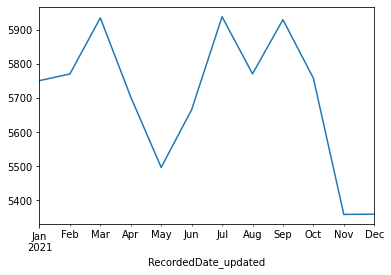

In [29]:
# Basic plot
monthly_netflix.plot()

<AxesSubplot:title={'center':'Monthly netflix usage in MB'}, xlabel='RecordedDate_updated'>

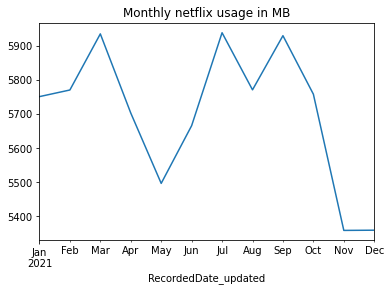

In [35]:
# Lets give title

monthly_netflix.plot(title="Monthly netflix usage in MB", y="Hi")

Text(0, 0.5, 'Netflix Usage in MB')

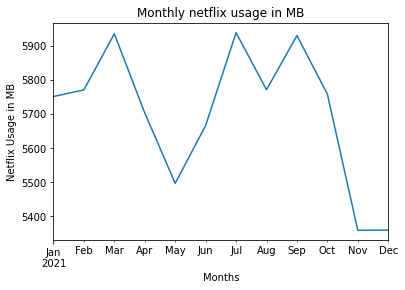

In [38]:
# Lets give the x-axis and y-axis label

ax = monthly_netflix.plot(title="Monthly netflix usage in MB")
ax.set_xlabel("Months")
ax.set_ylabel("Netflix Usage in MB")

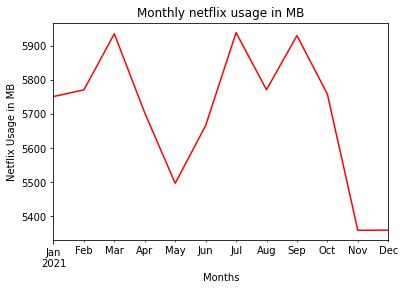

In [44]:
ax = monthly_netflix.plot(title="Monthly netflix usage in MB")
ax.set_xlabel("Months")
ax.set_ylabel("Netflix Usage in MB")

# Styling
ax.get_lines()[0].set_color("red")

### Exercise

1. Change RecordedDate to this format: YYYY-MM-DD in 'RecordedDate_updated_exercise' column
ANS: d_data['RecordedDate_updated_exercise'] = d_data['RecordedDate_updated'].dt.strftime('%Y-%m-%d')
2. Set timedelta to 2 Days format
ANS: timedelta_2days = timedelta.astype('timedelta64[2D]')
3. Set the rolling mean of netflix from 2 months to 3 months
ANS: monthly_netflix.rolling(3).mean()
4. Change the line color to green
ANS: 
'''
ax = monthly_netflix.plot(title="Monthly netflix usage in MB")
ax.set_xlabel("Months")
ax.set_ylabel("Netflix Usage in MB")
ax.get_lines()[0].set_color("green")
'''

# End

#### Book Recommendation